In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from extra_methods import P_rates_sediments, P_wc_rates, boundary_P_fluxes, savefig, integrated_over_depth_masses

In [27]:
Fe_20y_hdf = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_20x_200g_full_scen_base_historical_20y17m_sediment_2015_2100.mat', 'r')

In [5]:
boundary_P_fluxes(Fe_20y_hdf, start=12784, end=20089)

{'DOP_inflow': 0.32488259817063975,
 'DOP_outflow': 0.21896485838174526,
 'POP_inflow': 1.3758549296777982,
 'POP_outflow': 0.2026045957841887,
 'PP_outflow': 0.009366860219978592,
 'P_outflow': 0.1832829634515979,
 'Phy_outflow': 0.03286068614520415,
 'TP_inflow': 1.7007375278484385}

In [6]:
P_rates_sediments(Fe_20y_hdf, start=12784, end=20089)

R31a: -31.633
R32a: -0.000
R33a: -0.351
R33b: 2.303
R34a: -3.971
R34b: 0.344
R35a: -0.001
Ra: 2.148
Rf: 0.040
Rc: 0.000
R3a_P: 10.641
R3b_P: 21.674
R3f_P: 0.113
R3c_P: 0.000
R4a_P: 0.000
R4b_P: 0.000
R4f_P: 0.000
R4c_P: 0.000
sum: 1.308


In [7]:
integrated_over_depth_masses(Fe_20y_hdf, start=12784, end=20089)

({'C': 0.028784755724532957,
  'Chl': 0.06578695937158827,
  'DOP': 1.2466308065829144,
  'P': 1.5008975798069795,
  'POP': 1.8011194221647646,
  'PP': 0.11513857585276394},
 {'Ca3PO42': 303.4393853924924,
  'Fe3PO42': 616.2516961406169,
  'PO4': 0.2850367532768806,
  'PO4adsa': 189.05539077492972,
  'PO4adsb': 0.0015154163836162981,
  'PO4adsc': 1080.6004435870068,
  'POP': 885.0036074929761})

In [8]:
P_wc_rates(Fe_20y_hdf, start=12784, end=20089)

Re: 0.546
Rc: 0.453
Growth_bioz: -1.768
Loss_bioz: 4.357
R31a: -0.653
R32a: -0.000
R33a: -0.000
R34a: -0.000
sum: 2.934


In [9]:
start=12784
end=20089

In [10]:
fx_convert =  365 * 10**2

In [11]:
fx_convert/31000*(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['POP'][start:end,:])) + np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'][start:end,:])) )

-1.7461908860428725

In [12]:
fx_convert/32000*(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['O2'][start:end,:])))

-545.3200423155788

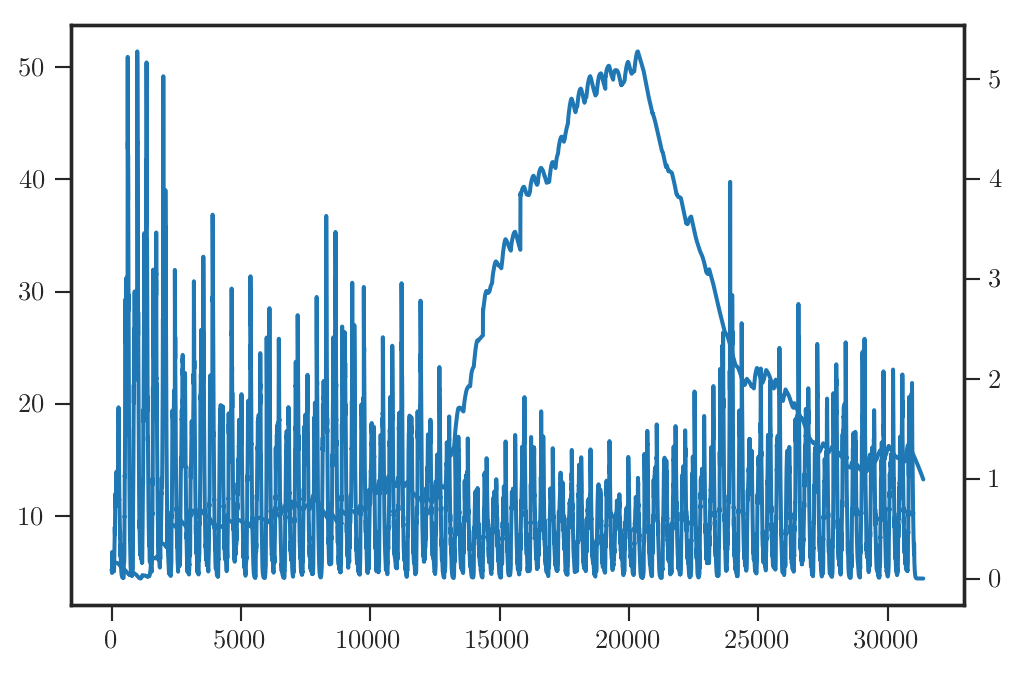

In [13]:
plt.plot(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:]),axis=1)/2.5/1000*100)
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:]),axis=1))
# ax3 = ax2.twinx()
# ax3.plot(np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1))

In [14]:
days = len(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['C'])[:,8])

In [15]:
date = datetime(2015-55, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [40]:
Fe_pd = pd.DataFrame({'Date': ds})
Fe_pd['DIP fx'] = np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(Fe_20y_hdf['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
Fe_pd['Fe(III) sed'] = np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:100]),axis=1)/2.5/1000*100
Fe_pd['DIP 4m'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1)
Fe_pd['Phy'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:13]),axis=1) + np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['C'][:,:13]),axis=1)
Fe_pd['Inflw Fe(III)'] = np.array(Fe_20y_hdf['MyLake_results']['basin1']['Inflw'][17,:])*np.array(Fe_20y_hdf['MyLake_results']['basin1']['Inflw'][0,:])/ 2.38e+7/1.65
Fe_pd['Year'] = Fe_pd.Date.dt.year
Fe_pd['Month'] = Fe_pd.Date.dt.month
Fe_pd['Day'] = Fe_pd.Date.dt.day
Fe_pd['DOY'] = Fe_pd.Date.dt.dayofyear
Fe_pd['WOY'] = Fe_pd.Date.dt.weekofyear

Text(0,0.5,'Fe(III) loads, [$mg\\cdot m^{-2} \\cdot d^{-1}$]')

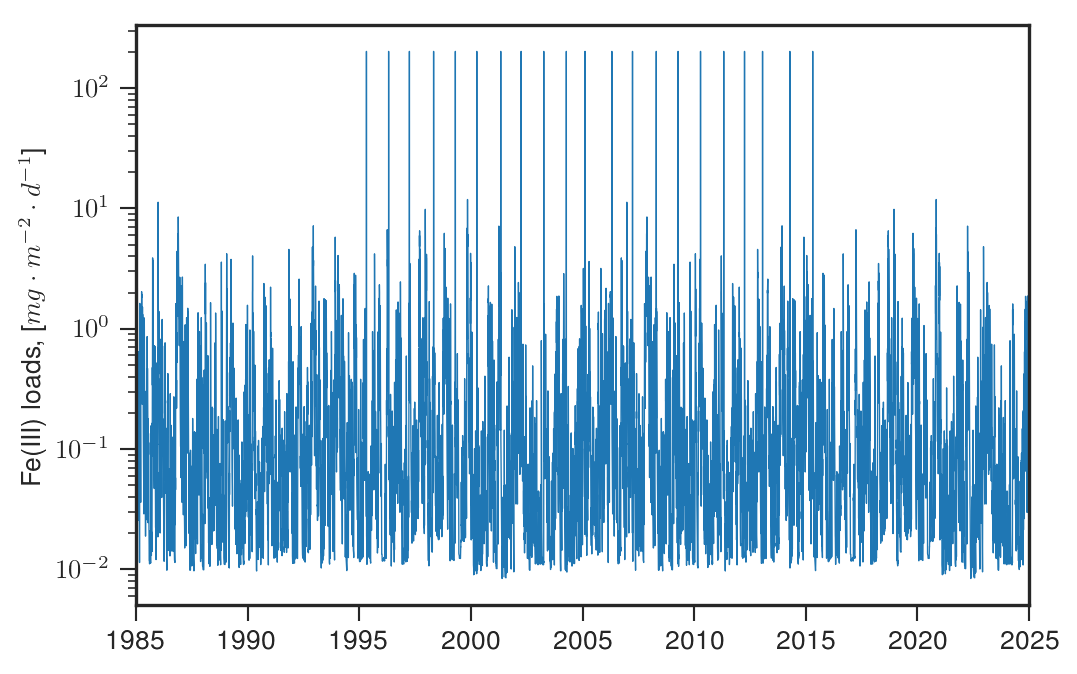

In [59]:
# Fe_pd.plot(x='Date', y='Inflw Fe(III)')
plt.semilogy(Fe_pd.Date.values, Fe_pd['Inflw Fe(III)'].values, lw=0.5)

plt.xticks([datetime(int(x), 1, 1) for x in np.linspace(1980, 2035, 12)])
plt.xlim([datetime(1985, 1, 1), datetime(2025, 1, 1)])
plt.ylabel('Fe(III) loads, [$mg\cdot m^{-2} \cdot d^{-1}$]')
# plt.xticks(np.linspace(1985, 2025, 9))

In [18]:
2047+53

2100

In [19]:
Fe_pd.tail()

,Date,DIP fx,Fe(III) sed,DIP 4m,Phy,Inflw Fe(III),Year,Month,Day,DOY,WOY
31376,2045-11-26,0.808525,34.664657,48.497087,1.024771e-11,NaN,2045,11,26,330,47
31377,2045-11-27,0.808441,34.645822,48.563242,9.514362e-12,NaN,2045,11,27,331,48
31378,2045-11-28,0.808358,34.626989,48.629366,8.833536e-12,NaN,2045,11,28,332,48
31379,2045-11-29,0.808276,34.608159,48.695458,8.201466e-12,NaN,2045,11,29,333,48
31380,2045-11-30,0.808194,34.589330,48.761518,7.614656e-12,NaN,2045,11,30,334,48


In [20]:
Fe_pd[12784:20089]

,Date,DIP fx,Fe(III) sed,DIP 4m,Phy,Inflw Fe(III),Year,Month,Day,DOY,WOY
12784,1995-01-01,1.498124,34.654535,13.689839,0.233948,3.488131,1995,1,1,1,52
12785,1995-01-02,1.490983,34.648253,13.905469,0.222854,3.464869,1995,1,2,2,1
12786,1995-01-03,1.479729,34.641943,14.117669,0.211784,3.461715,1995,1,3,3,1
12787,1995-01-04,1.475581,34.635611,14.328224,0.201305,3.459743,1995,1,4,4,1
12788,1995-01-05,1.471668,34.629256,14.536702,0.191542,3.456983,1995,1,5,5,1
12789,1995-01-06,1.467736,34.622877,14.743043,0.182501,3.456195,1995,1,6,6,1
12790,1995-01-07,1.463845,34.616476,14.947412,0.173587,3.455406,1995,1,7,7,1
12791,1995-01-08,1.460092,34.610053,15.149634,0.165419,3.455012,1995,1,8,8,1
12792,1995-01-09,1.456756,34.603589,15.244239,0.155885,3.451463,1995,1,9,9,2
12793,1995-01-10,1.452732,34.597110,15.443486,0.148904,3.539781,1995,1,10,10,2


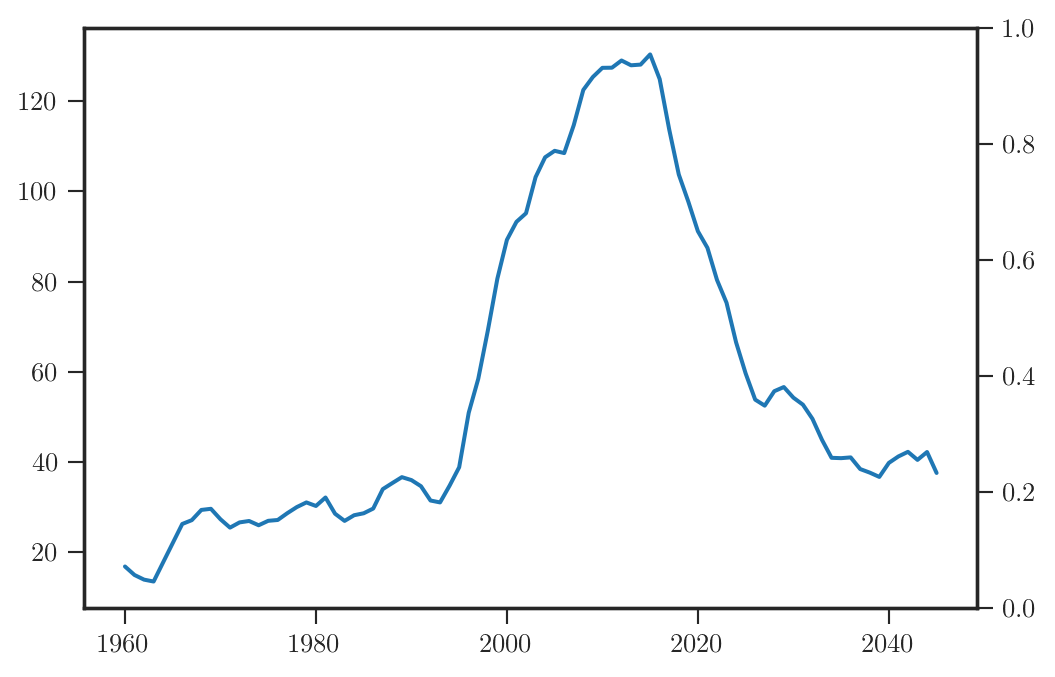

In [21]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,4))
ax1.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'])
ax2 = ax1.twinx()

In [22]:
fx_convert =  365 * 10**2

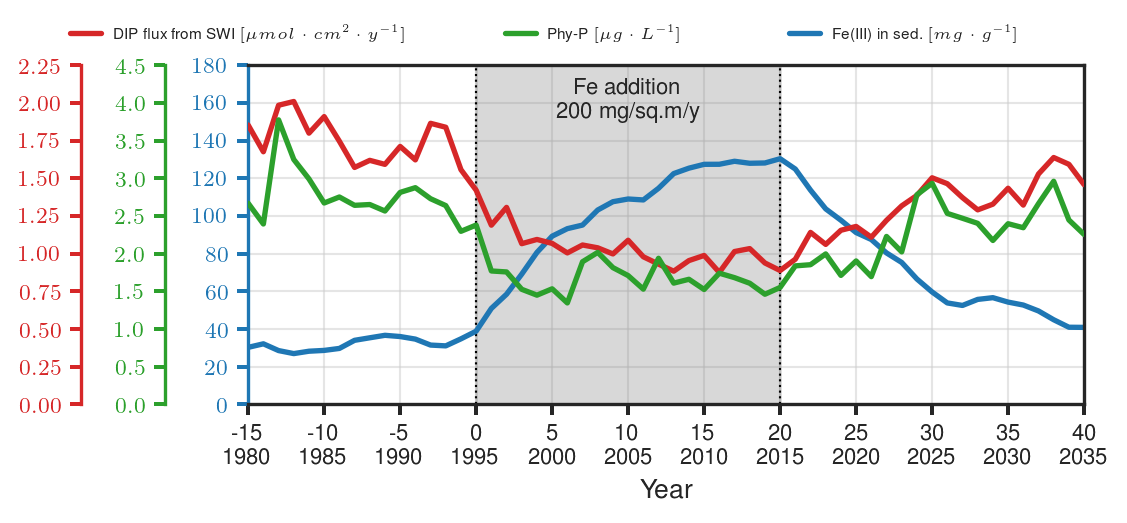

In [23]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, (host) = plt.subplots(1,1, figsize=(6,3))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'], c=sns.color_palette()[0], label="Fe(III) in sed. $[mg\cdot g^{-1}]$", lw=2)
p2, = par1.plot(Fe_pd['Year'].unique(), fx_convert/31000*Fe_pd.groupby(['Year']).mean()['DIP fx'], c=sns.color_palette()[3], label="DIP flux from SWI $[\mu mol \cdot cm^2\cdot y^{-1}]$", lw=2)
p3, = par2.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Phy'], c=sns.color_palette()[2], label="Phy-P $[\mu g\cdot L^{-1}]$", lw=2)



host.set_xlabel("Year")
# host.set_ylabel("Fe(III) sed")
# par1.set_ylabel("DIP fx")
# par2.set_ylabel("Phy")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), labelsize='small', **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), labelsize='small', **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), labelsize='small', **tkw)
host.tick_params(axis='x', **tkw)

par1.spines["left"].set_position(("axes", -0.2)) # red one
par2.spines["left"].set_position(("axes", -0.1)) # green one
host.spines["left"].set_color(p1.get_color()) # green one
par1.spines["left"].set_color(p2.get_color()) # green one
par2.spines["left"].set_color(p3.get_color()) # green one

make_patch_spines_invisible(par1)
make_patch_spines_invisible(par2)

par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')

par2.spines["left"].set_visible(True)
par2.yaxis.set_label_position('left')
par2.yaxis.set_ticks_position('left')

lines = [p1, p2, p3]

# host.legend(lines, [l.get_label() for l in lines], loc=2, frameon=1, fontsize='xx-small')
host.grid(alpha=0.5)

host.vlines([1995,2015], 0, 200, linestyle=':', lw=.8)
host.axvspan(1995, 2015, alpha=0.3, color='gray')

# legend1 = pyplot.legend(, ["algo1", "algo2", "algo3"], loc=1)
shiftx = 0.1
host.legend([lines[0]], [lines[0].get_label()], loc=(0.54+shiftx,1.05), frameon=0, fontsize='xx-small')
par1.legend([lines[1]], [lines[1].get_label()], loc=(-0.32+shiftx,1.05), frameon=0, fontsize='xx-small')
par2.legend([lines[2]], [lines[2].get_label()], loc=(0.2+shiftx,1.05), frameon=0, fontsize='xx-small')
# par1.add_artist(l2)
# plt.tight_layout()
host.text(2005,152, 'Fe addition\n200 mg/sq.m/y', fontsize='small', horizontalalignment='center')


plt.subplots_adjust(left=0.2, bottom=0.15, right=None, top=None,
                wspace=None, hspace=None)

# host.margins(x=1, y=1)
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.gcf().subplots_adjust(right=0.3)

host.set_xticks(np.linspace(1980,2040,13))
host.set_xticklabels(['-15\n1980','-10\n1985','-5\n1990','0\n1995','5\n2000','10\n2005','15\n2010','20\n2015','25\n2020','30\n2025', '35\n2030', '40\n2035'], fontsize='small')

# host.set_xlim(1985, 2030)
plt.tight_layout(pad=2.5)

host.set_xlim(1980, 2035)
host.set_ylim(0, 180)
par1.set_ylim(0., 2.25)
par2.set_ylim(0, 4.5)
host.set_yticks(np.linspace(0,180,10))
par1.set_yticks(np.linspace(0,2.25,10))
par2.set_yticks(np.linspace(0,4.5,10))

# savefig('cc/Fe/Fe_Phy_Pfx_2')


plt.show()

In [24]:
Fe_20y_hdf.close()